In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [87]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [88]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [89]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

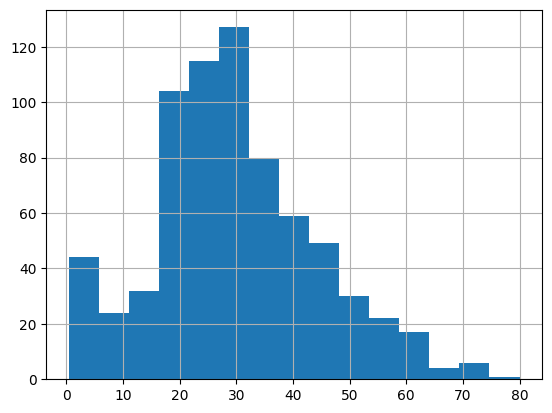

In [90]:
train["Age"].hist(bins=15) # imputation with median

In [91]:
train["Embarked"].value_counts() # fill with often values

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [92]:
train_data = train.copy()

In [93]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [94]:
train_data = train_data.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis=1)

In [95]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [96]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median(skipna=True))

In [98]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [99]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].value_counts().idxmax())

In [100]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [101]:
# One Hot encoder, Dummy variables

train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"])

In [102]:
train_data = train_data.drop("Sex_male", axis=1)

In [103]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,False,True
1,1,1,38.0,1,0,71.2833,True,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,True
888,0,3,28.0,1,2,23.4500,True,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,False,False


In [104]:
train_data["travel_alone"] = np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)

In [105]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,travel_alone
0,0,3,22.0,1,0,7.2500,False,False,False,True,0
1,1,1,38.0,1,0,71.2833,True,True,False,False,0
2,1,3,26.0,0,0,7.9250,True,False,False,True,1
3,1,1,35.0,1,0,53.1000,True,False,False,True,0
4,0,3,35.0,0,0,8.0500,False,False,False,True,1


In [106]:
train_data = train_data.drop(["SibSp", "Parch"], axis=1)

In [107]:
final_train = train_data.copy()

In [108]:
test_data = test.copy()

In [109]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

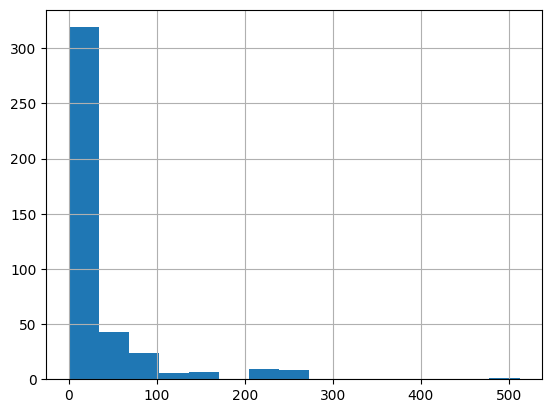

In [110]:
test_data["Fare"].hist(bins=15)

In [111]:
test_data["Age"] = test_data["Age"].fillna(train_data["Age"].median(skipna=True))
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].median())

test_data = test_data.drop("Cabin", axis=1)
test_data["travel_alone"] = np.where((test_data["SibSp"] + test_data["Parch"]) > 0, 0, 1)

test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"])
test_data = test_data.drop(["SibSp", "Parch", "PassengerId", "Name", "Ticket", "Sex_male"], axis=1)

test_data.head()

,Pclass,Age,Fare,travel_alone,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,False,False,True,False
1,3,47.0,7.0000,0,True,False,False,True
2,2,62.0,9.6875,1,False,False,True,False
3,3,27.0,8.6625,1,False,False,False,True
4,3,22.0,12.2875,0,True,False,False,True


In [112]:
test_data.shape

(418, 8)

In [113]:
final_train.shape

(891, 9)

In [114]:
final_test = test_data.copy()

In [116]:
feature_cols = final_test.columns

In [117]:
X = final_train[feature_cols]
y = final_train["Survived"]

In [118]:
model = LogisticRegression()

log_r = model.fit(X, y)
predictions = log_r.predict(final_test)

c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
y_pred = log_r.predict(X)

In [121]:
accuracy_score(y, y_pred)

0.7901234567901234

In [122]:
final_test["Survived"] = log_r.predict(final_test[feature_cols])

In [123]:
final_test

,Pclass,Age,Fare,travel_alone,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34.5,7.8292,1,False,False,True,False,0
1,3,47.0,7.0000,0,True,False,False,True,0
2,2,62.0,9.6875,1,False,False,True,False,0
3,3,27.0,8.6625,1,False,False,False,True,0
4,3,22.0,12.2875,0,True,False,False,True,1
...,...,...,...,...,...,...,...,...,...
413,3,28.0,8.0500,1,False,False,False,True,0
414,1,39.0,108.9000,1,True,True,False,False,1
415,3,38.5,7.2500,1,False,False,False,True,0
416,3,28.0,8.0500,1,False,False,False,True,0
